@author = Ali Masoumnia

amasoumnia@outlook.com

## Minimum Spanning Tree

## Introduction

A minimum spanning tree is an acylical subset of an undirected graph where the sum of all weights is kept at a full minimum, while the tree still spans the graph. In this implementation, an undirected weighted graph is represented by an adjacency matrix and is both input and output of the mst function. Pandas dataframes are used for these matrices to facilitate the string indicies of tickers as nodes. The pseudocode for this function is presented in: https://arxiv.org/abs/1703.00485.

In [4]:
import numpy as np
import pandas as pd

#function written for pandas adjacency matrices
from kruksal import mst

In [5]:
df = pd.read_csv("amex_rand50.csv", parse_dates=True, index_col='date')

### Computing log Returns of the Assets

In [6]:
x = lambda p: np.log10(p) - np.log10(p.shift(1)) #log return function
log_ret = df.apply(x)[1:] #log return dataframe
log_ret

,DF,SQBG,C,PPC,VOD,TRUP,NATI,GNUS,RINF,DMLP,...,GER,DVYE,GAM,AY,LAC,NKSH,EME,BBDO,GRIF,IMGN
date,,,,,,,,,,,,,,,,,,,,,
2015-05-01,0.001601,-0.004577,0.003569,0.012820,-0.003344,0.018923,-0.003660,-0.026245,0.003161,0.000759,...,0.004232,0.001143,0.004048,-0.004894,-0.021540,-0.001500,0.006855,0.000000,0.000000,0.006256
2015-05-04,-0.001868,-0.005700,0.003300,0.000853,0.001242,0.009436,0.002596,-0.005733,-0.003851,-0.002280,...,-0.002816,0.004447,0.001341,0.006684,0.007299,0.000900,0.001625,-0.009984,0.012038,0.001550
2015-05-05,-0.004300,-0.003601,-0.006624,-0.005487,-0.003485,0.003826,0.003034,0.016978,0.000690,0.003793,...,0.003658,0.001972,-0.004527,0.000892,0.007179,-0.008324,0.000953,-0.009358,0.000000,-0.015222
2015-05-06,-0.002709,0.003960,-0.004336,-0.012427,0.006451,0.003253,-0.004864,-0.016978,0.000000,0.003573,...,-0.005073,-0.002443,-0.002591,-0.007446,0.020850,-0.002452,0.002847,-0.002155,0.000000,-0.004835
2015-05-07,-0.001634,0.014102,0.004010,-0.002314,-0.000616,0.000000,-0.000306,-0.016169,0.000000,-0.004707,...,-0.001989,-0.003026,0.001606,0.008082,-0.006839,-0.001077,-0.003228,0.007285,0.000135,0.010671
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-12,0.000000,-0.041037,0.009837,0.008305,0.006201,-0.004163,0.008265,0.017912,0.002498,0.008820,...,0.006839,0.002333,0.000381,0.001729,0.004757,-0.003360,0.003015,-0.006656,0.007202,-0.006434
2019-04-15,0.031314,0.007755,-0.000258,0.008516,0.006347,0.002331,-0.003046,0.002188,-0.000156,-0.003371,...,-0.007606,0.001267,0.002281,0.000862,-0.007636,0.000421,0.000906,0.000559,0.003439,0.009616
2019-04-16,-0.039509,0.003826,0.012265,0.012825,-0.000467,-0.009777,0.002954,0.000000,-0.000312,0.000902,...,-0.005405,0.000843,0.001514,-0.000862,-0.023749,-0.006365,0.000170,0.001671,-0.003082,-0.004781


### Computing the Correlation Matrix

In [7]:
corr = log_ret.corr() #correlation matrix (dataframe) of log returns
corr

,DF,SQBG,C,PPC,VOD,TRUP,NATI,GNUS,RINF,DMLP,...,GER,DVYE,GAM,AY,LAC,NKSH,EME,BBDO,GRIF,IMGN
DF,1.000000,0.134295,0.117884,0.185416,0.134690,0.072274,0.079081,0.059838,0.030613,0.082329,...,0.110893,0.095780,0.162096,0.059253,0.013526,0.123530,0.116517,0.069471,0.022214,0.045443
SQBG,0.134295,1.000000,0.188575,0.073260,0.085516,0.144972,0.159547,0.086579,0.105411,0.130219,...,0.160279,0.177127,0.184769,0.115473,0.056405,0.167408,0.230055,0.113140,0.154118,0.028745
C,0.117884,0.188575,1.000000,0.195809,0.401970,0.250866,0.358793,0.089070,0.207429,0.189276,...,0.423860,0.539164,0.594398,0.246211,0.189167,0.330709,0.481906,0.182026,0.143624,0.223703
PPC,0.185416,0.073260,0.195809,1.000000,0.217682,0.100858,0.160136,0.047757,0.096466,0.102827,...,0.149429,0.247542,0.236449,0.136715,0.032140,0.132911,0.249026,0.132804,0.060087,0.037325
VOD,0.134690,0.085516,0.401970,0.217682,1.000000,0.054646,0.224806,0.109669,0.091964,0.123914,...,0.301992,0.460423,0.400955,0.183211,0.101225,0.148344,0.255465,0.144951,0.048907,0.155452
TRUP,0.072274,0.144972,0.250866,0.100858,0.054646,1.000000,0.213302,-0.004193,0.068103,0.087518,...,0.138302,0.204934,0.239660,0.145081,0.097276,0.217666,0.243584,0.068564,0.076308,0.089468
NATI,0.079081,0.159547,0.358793,0.160136,0.224806,0.213302,1.000000,0.025573,0.075845,0.141107,...,0.233829,0.363862,0.396882,0.168621,0.126861,0.230386,0.403664,0.162042,0.073413,0.161721
GNUS,0.059838,0.086579,0.089070,0.047757,0.109669,-0.004193,0.025573,1.000000,0.033590,0.047493,...,0.149547,0.080735,0.053558,0.063280,0.077096,0.073506,0.056087,-0.019714,0.083590,0.042534
RINF,0.030613,0.105411,0.207429,0.096466,0.091964,0.068103,0.075845,0.033590,1.000000,0.115095,...,0.209557,0.163020,0.120953,0.139755,0.110883,0.091549,0.152449,0.057738,0.020015,0.066018
DMLP,0.082329,0.130219,0.189276,0.102827,0.123914,0.087518,0.141107,0.047493,0.115095,1.000000,...,0.384791,0.304740,0.212286,0.132744,0.101404,0.118872,0.201675,0.148910,-0.009387,0.080556


### Computing the Distance Matrix

In [8]:
dist = np.sqrt((1 - corr) / 2) #distance dataframe
dist

,DF,SQBG,C,PPC,VOD,TRUP,NATI,GNUS,RINF,DMLP,...,GER,DVYE,GAM,AY,LAC,NKSH,EME,BBDO,GRIF,IMGN
DF,0.000000,0.657915,0.664122,0.638194,0.657765,0.681075,0.678572,0.685625,0.696199,0.677374,...,0.666748,0.672391,0.647265,0.685838,0.702308,0.661993,0.664636,0.682103,0.699209,0.690854
SQBG,0.657915,0.000000,0.636956,0.680713,0.676197,0.653846,0.648249,0.675803,0.668801,0.659462,...,0.647966,0.641433,0.638448,0.665029,0.686875,0.645210,0.620461,0.665905,0.650339,0.696870
C,0.664122,0.636956,0.000000,0.634110,0.546822,0.612019,0.566218,0.674881,0.629512,0.636681,...,0.536722,0.480019,0.450334,0.613917,0.636723,0.578486,0.508967,0.639521,0.654361,0.623016
PPC,0.638194,0.680713,0.634110,0.000000,0.625427,0.670501,0.648022,0.690015,0.672136,0.669766,...,0.652139,0.613375,0.617880,0.656995,0.695651,0.658441,0.612770,0.658482,0.685534,0.693785
VOD,0.657765,0.676197,0.546822,0.625427,0.000000,0.687515,0.622573,0.667207,0.673809,0.661848,...,0.590766,0.519412,0.547286,0.639057,0.670364,0.652555,0.610137,0.653853,0.689599,0.649826
TRUP,0.681075,0.653846,0.612019,0.670501,0.687515,0.000000,0.627176,0.708588,0.682604,0.675456,...,0.656391,0.630502,0.616579,0.653804,0.671835,0.625433,0.614986,0.682435,0.679592,0.674734
NATI,0.678572,0.648249,0.566218,0.648022,0.622573,0.627176,0.000000,0.698007,0.679763,0.655321,...,0.618939,0.563976,0.549144,0.644740,0.660734,0.620328,0.546048,0.647286,0.680657,0.647410
GNUS,0.685625,0.675803,0.674881,0.690015,0.667207,0.708588,0.698007,0.000000,0.695130,0.690111,...,0.652094,0.677962,0.687911,0.684368,0.679302,0.680623,0.686991,0.714043,0.676909,0.691905
RINF,0.696199,0.668801,0.629512,0.672136,0.673809,0.682604,0.679763,0.695130,0.000000,0.665171,...,0.628666,0.646908,0.662966,0.655837,0.666752,0.673962,0.650980,0.686390,0.699995,0.683367
DMLP,0.677374,0.659462,0.636681,0.669766,0.661848,0.675456,0.655321,0.690111,0.665171,0.000000,...,0.554621,0.589602,0.627580,0.658504,0.670297,0.663750,0.631793,0.652338,0.710418,0.678028


### Taking the Minimum Spanning Tree of Asset Distance

In [9]:
mst_50 = mst(dist)
mst_50

,DF,SQBG,C,PPC,VOD,TRUP,NATI,GNUS,RINF,DMLP,...,GER,DVYE,GAM,AY,LAC,NKSH,EME,BBDO,GRIF,IMGN
DF,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
SQBG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.620461,0.00000,0.000000,0.000000
C,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
PPC,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
VOD,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
TRUP,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
NATI,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
GNUS,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.652094,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
RINF,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.628666,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
DMLP,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000


## Using Networkx for Visualization

In [10]:
import networkx as nx

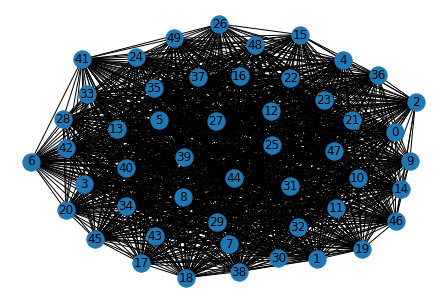

In [19]:
#visualizing our original distance graph
d_graph = nx.from_numpy_array(np.array(dist)) 
nx.draw(d_graph, with_labels=True)

## Visualizing NX MST

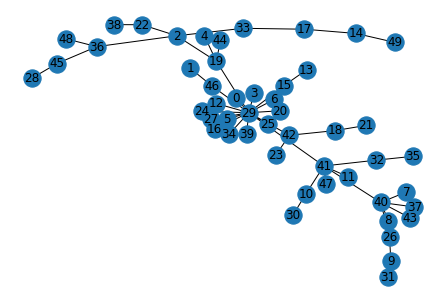

In [23]:
#using nx to compute MST
d_mst = nx.minimum_spanning_tree(d_graph)
nx.draw(d_mst, with_labels=True)

## Visualizing my MST

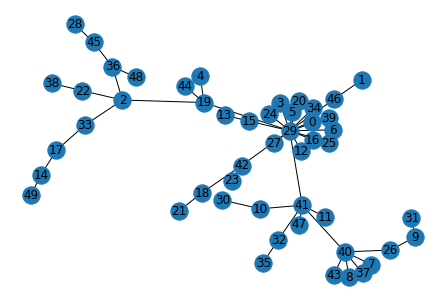

In [24]:
my_mst = nx.from_numpy_array(np.array(mst_50)) 
nx.draw(my_mst, with_labels=True)

### We now visualize the hierarchical nature of the distance matrix

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

<Figure size 504x504 with 0 Axes>

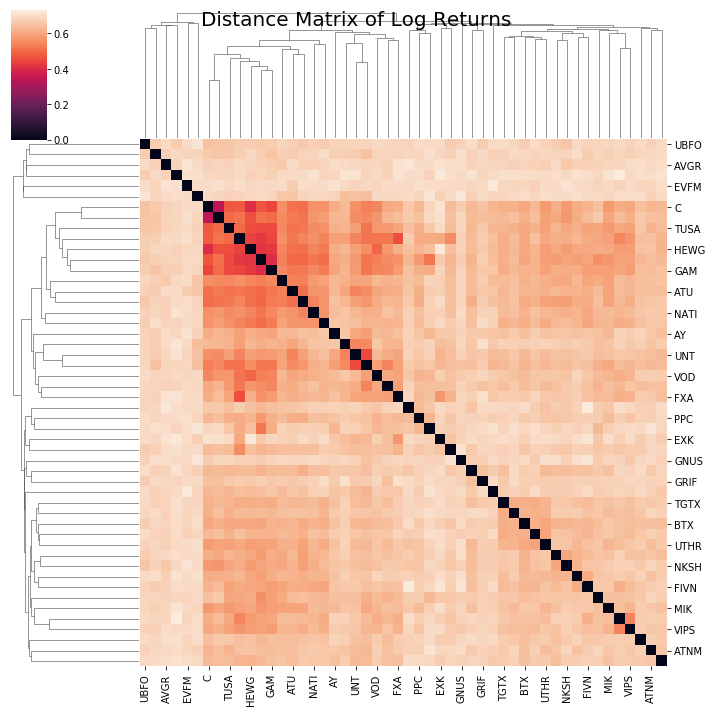

In [20]:
plt.figure(figsize=(7, 7))
dist_map = sns.clustermap(dist)
dist_map.fig.suptitle('Distance Matrix of Log Returns', fontsize = 20)
plt.show()

## Conclusion

This imlpementation of the minimum spanning tree makes use of depth first search to indentify if a node is connected. This was chosen as opposed to breadth first search (or the consecutive powering of the adjacency matrices at O{n^3} ) to identify all possible paths between two nodes. The minimum spanning is replicated, however, the "check for connection" process has not been vectorized, which is where future research can be performed.